In [1]:
import xarray as xr
import numpy as np
from data_processor import DataProcessor
from simplePredictor import SimplePredictor

In [2]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy()
sp_numpy = ds.sp.to_numpy()
data = np.stack((t2m_numpy, sp_numpy), axis=-1)
data.shape
# (timestamps, lat, long, features)
feature_list = [ds.t2m.name, ds.sp.name]
processor = DataProcessor(data)
X, y = processor.preprocess(2)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

c:\Users\iwama\Desktop\Maciej\Eng\meteoapp-data\venv\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [3]:
X_test.shape, y_test.shape

((67, 1, 25, 45, 2), (67, 25, 45, 2))

In [4]:
predictor = SimplePredictor(X.shape, feature_list)

RMSE t2m: 1.456; R2 t2m: -2.368
RMSE sp: 65.347; R2 sp: 0.999


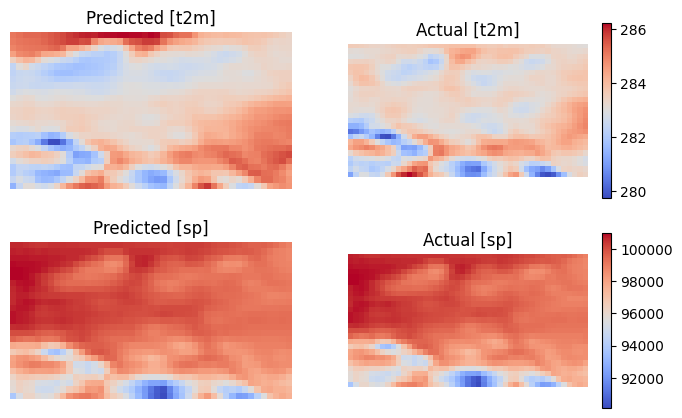

RMSE t2m: 2.139; R2 t2m: -2.455
RMSE sp: 78.058; R2 sp: 0.998


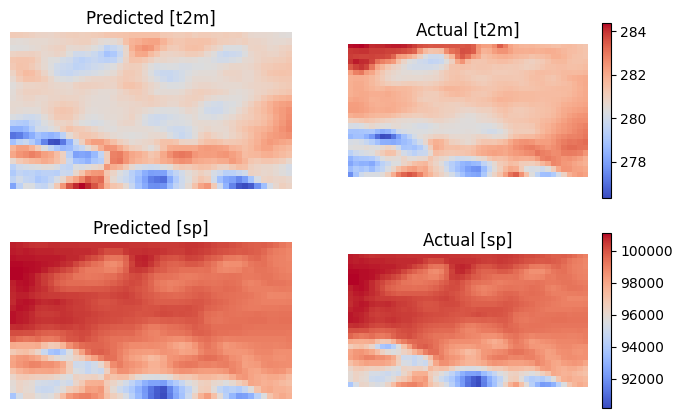

RMSE t2m: 2.159; R2 t2m: -0.606
RMSE sp: 171.238; R2 sp: 0.991


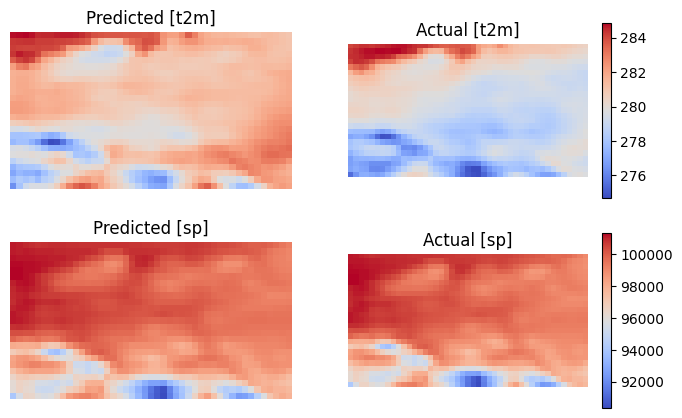

RMSE t2m: 0.984; R2 t2m: 0.726
RMSE sp: 106.625; R2 sp: 0.996


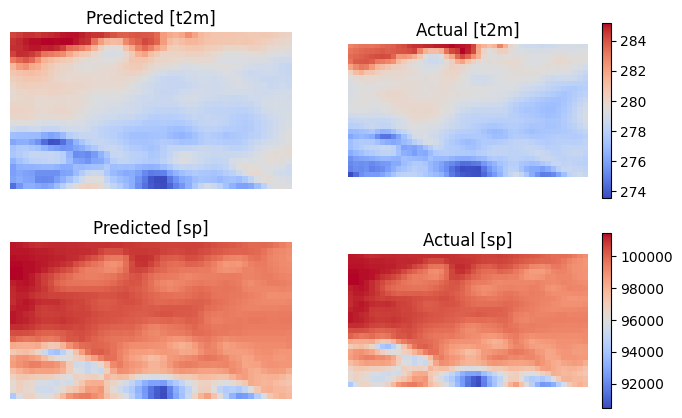

Evaluation metrics for entire test set:
RMSE t2m: 2.348181661048854; R2 t2m: 0.6702231486198502
RMSE sp: 157.30029782503178; R2 sp: 0.9942747644574942


In [5]:
_ = predictor.predict_and_evaluate(X_test, y_test, limit=4)